**What is Keras?**

Keras is an ML API and library built for integration with Python. It contains various modules and shortcuts for building and testing ML models. Keras is primarely built for neural networks. For example, binary classification and image classification very often depends on the Keras library. It is also an open-source Python library. Everything is saved as an HDF5 format - where the model architecture, weights, and compile information is saved. 

## The Model Build

### Compilation phase:
1. Keras loss function
2. Optimizers - helps you optimize the input weights. It allows you to compare the prediction and the loss function. 
3. Metrics - Evaluates the performance of your model
4. Then use the .fit() method to train the model

### Model Evaluation:
The model evaluation aims to estimate the general accuracy of the model.
1. Versbose - Useful to test the verbosity mode
2. Object - enables you to predict the model object you have to evluate
3. Batch_size - helps detect the number of samples per gradient update. The default is 32
4. Steps - specifies batches of samples. It represents a total number of steps before declaring the evluation round finished
5. sample_weight - optional array. It contains weights to apply to the model's loss for each sample
6. X - array of training data
7. Y - array of target data

### Model Prediction:
Keras provides you a predict() method to predict your model. It enables you to get the prediction of the trained models.
1. X - array of input data
2. batch_size - takes an int value, 32 by default
3. versbose 0 helps predict verbosity mode
4. steps -  It returns a total number of steps before declaring the evaluation round finished.
5. callabacks, provides you a list of callbacks to apply during prediction

**Project:**
Use neural network modeling to learn a mapping between patient profile attirbute as input features and heart disease as an output

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import libraries for data wrangling, preprocessing and visualization
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline


# ML Libraries
from keras.models import Sequential # deals with ordering or sequencing of layers within a model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
seed = 8
np.random.seed(seed)

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


The dataset contains the following features:

1. age(in years)
2. sex: (1 = male; 0 = female)
3. cp: chest pain type
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 1 or 0 ( with 1 = Yes has disease, and 0= No disease

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#let's see if we have any null values - we see no null values (yay!)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

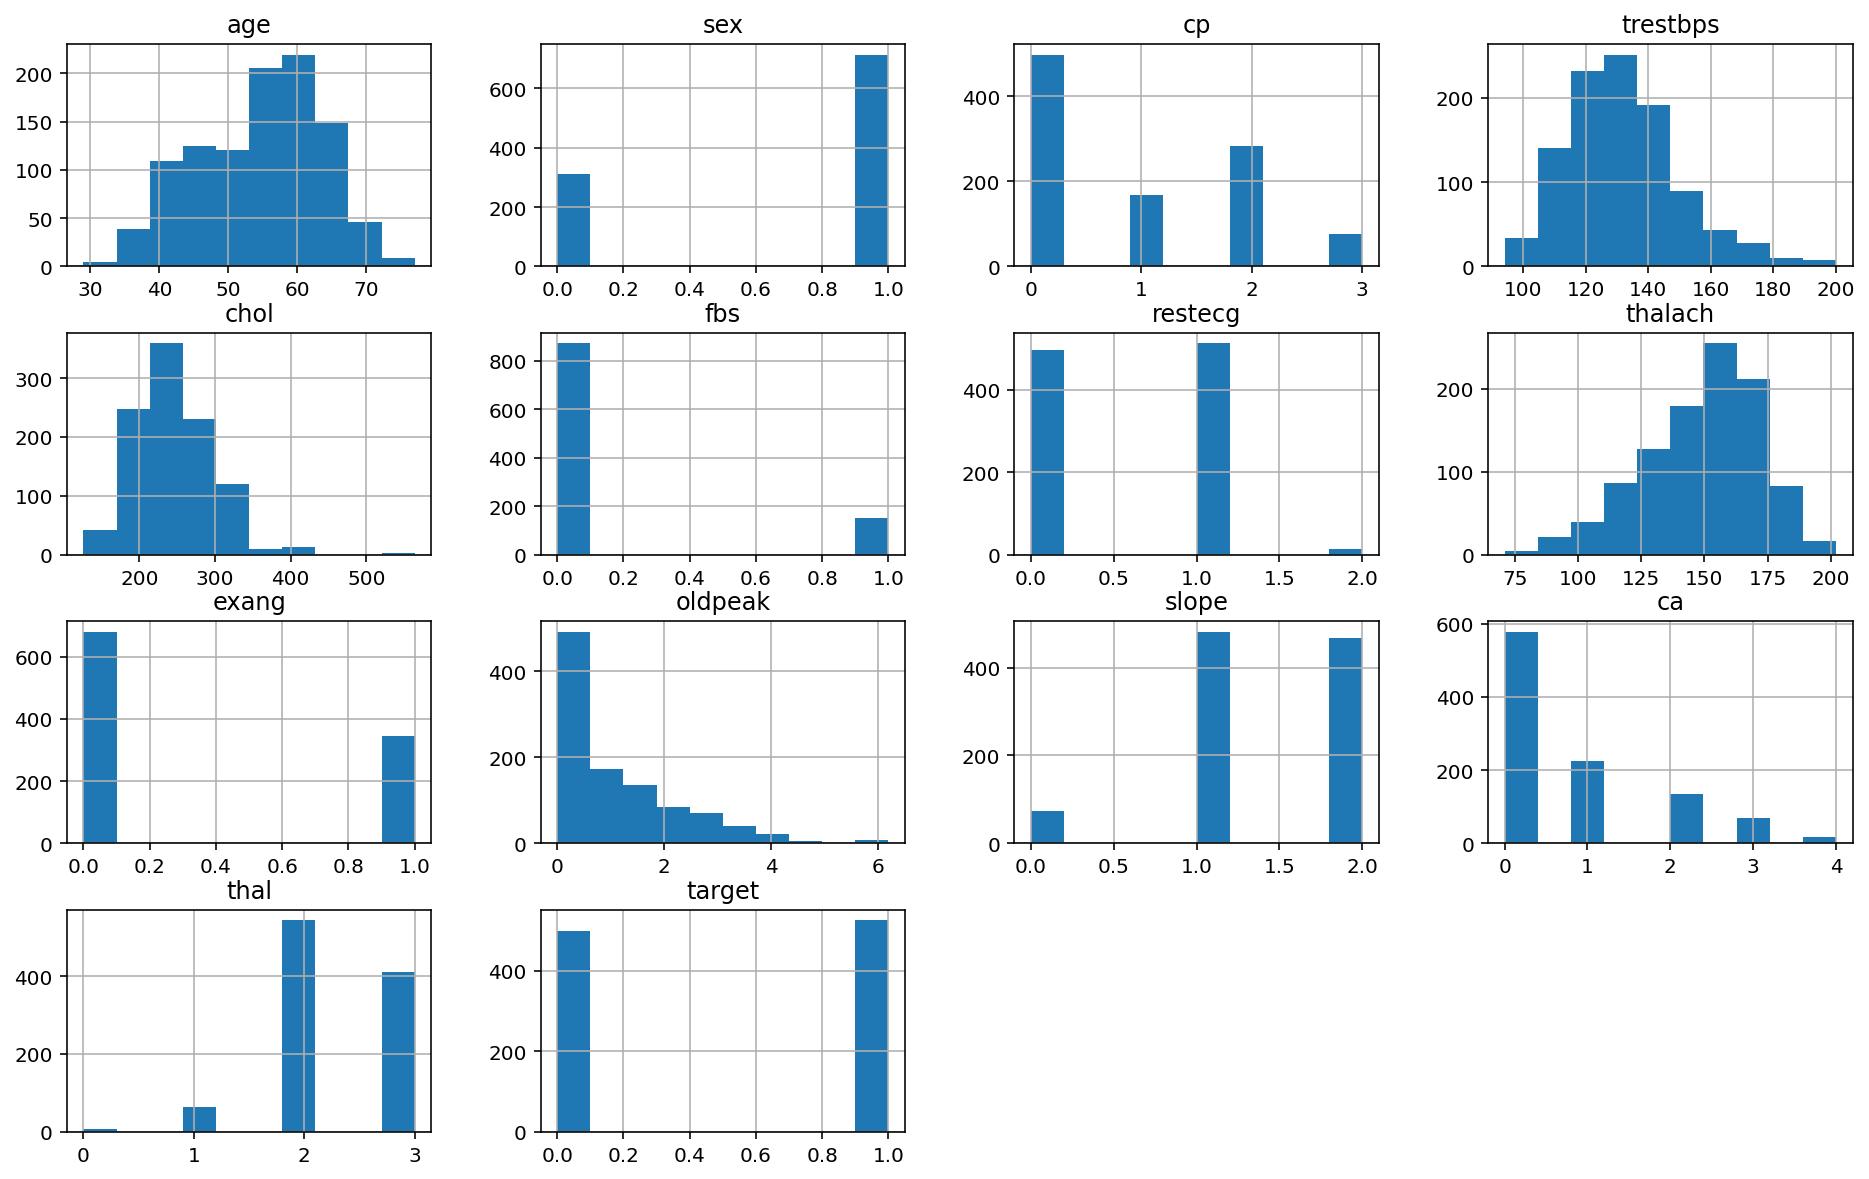

In [7]:
#basic visuals to gain a better understanding of the shape of the data

hist = df.hist(bins=10, figsize = (16,10))

Age Max: 77 min: 29


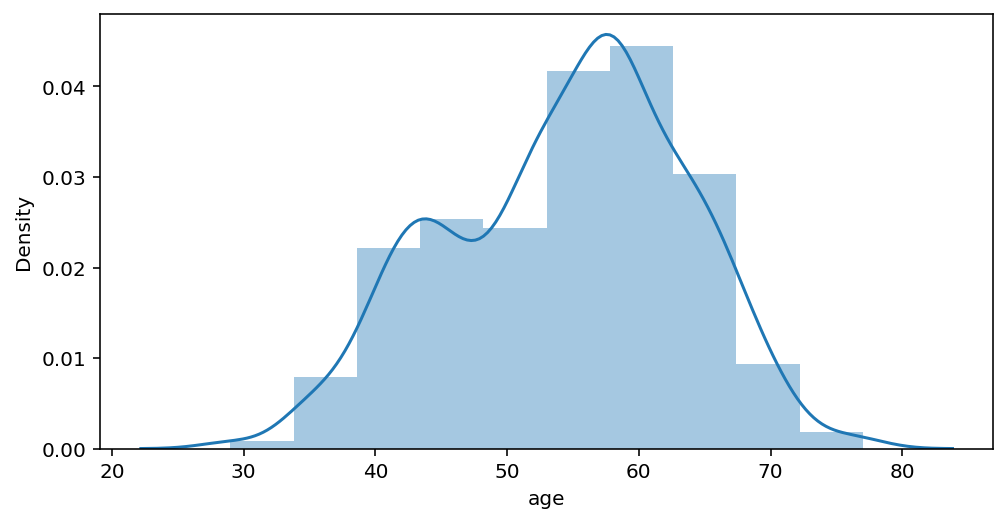

In [8]:
# Let's look at the age dataset and turn on the kernel function (kde)
plt.figure(figsize = (8,4))
sns.distplot(df['age'], kde=True, bins =10)
print("Age Max:", df['age'].max(), "min:", df['age'].min())

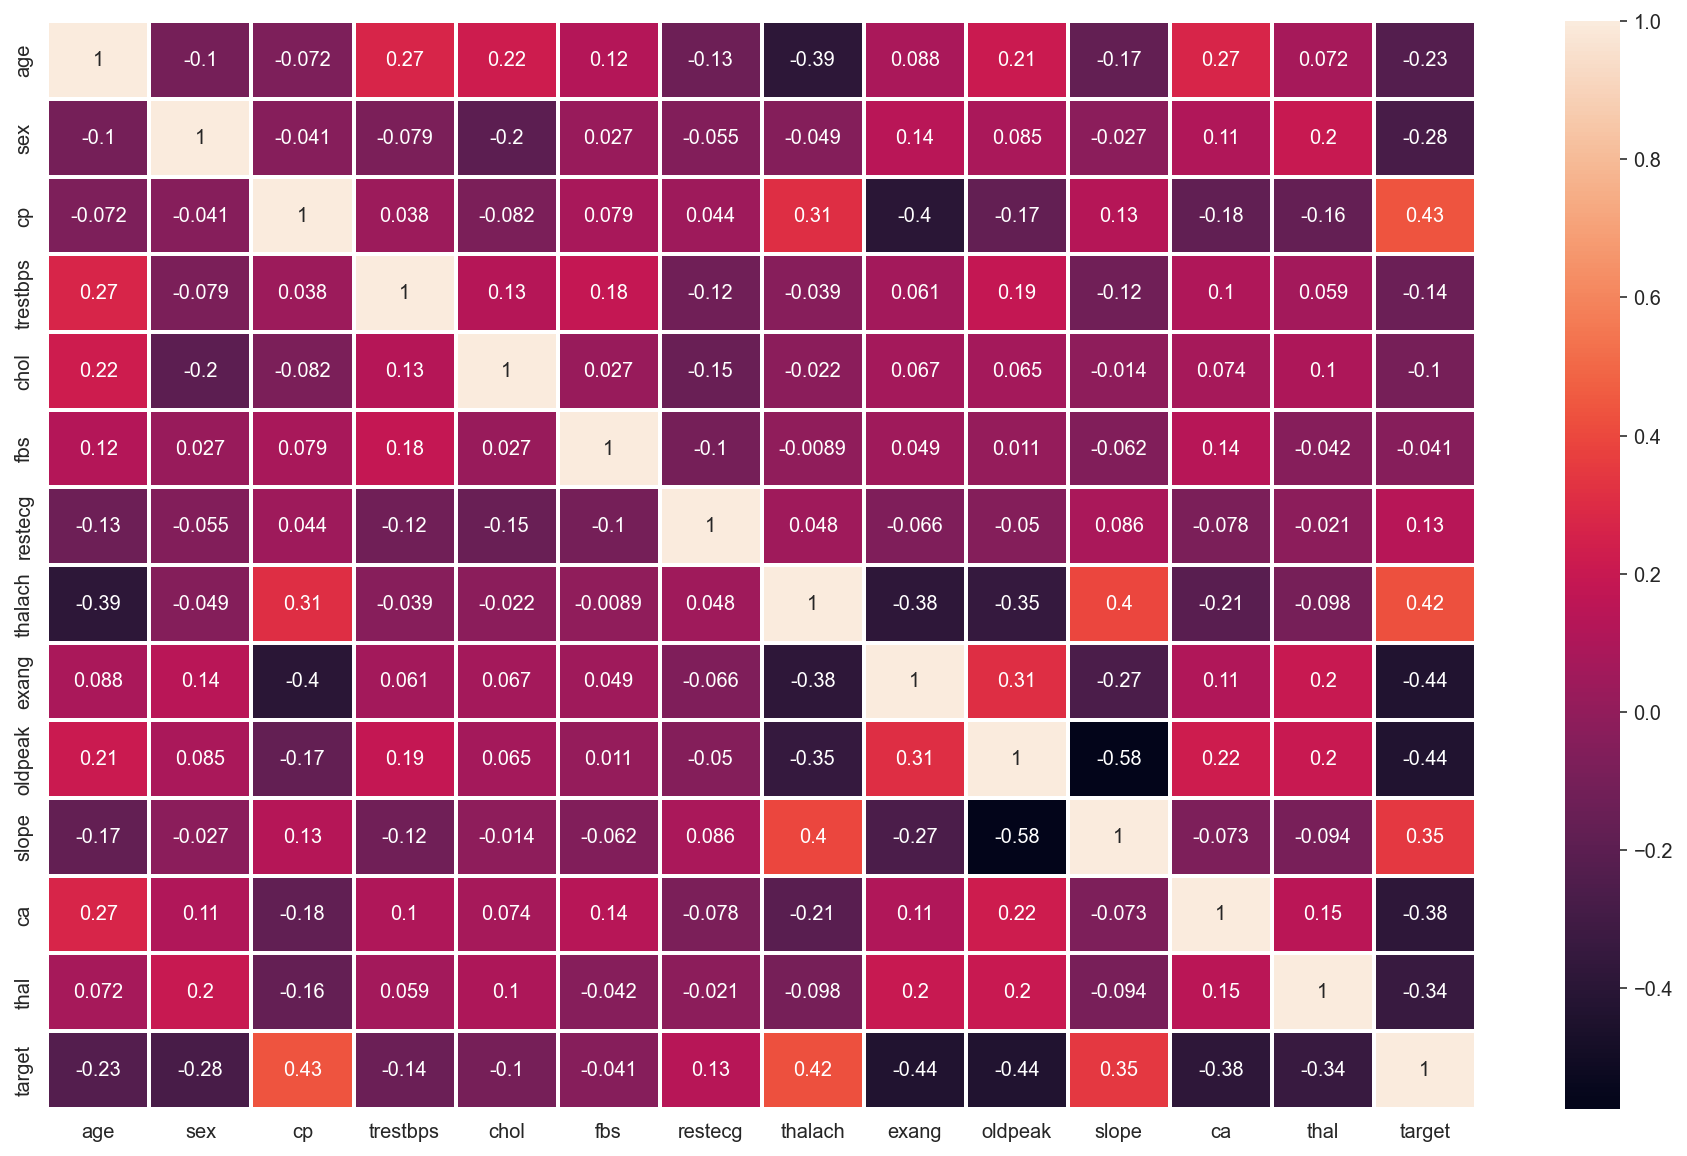

In [9]:
#Let's look at a heatmap - notice there isn't a significant amount of correlation
sns.set_style('whitegrid')
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(), annot = True, linewidths =2)
plt.show()

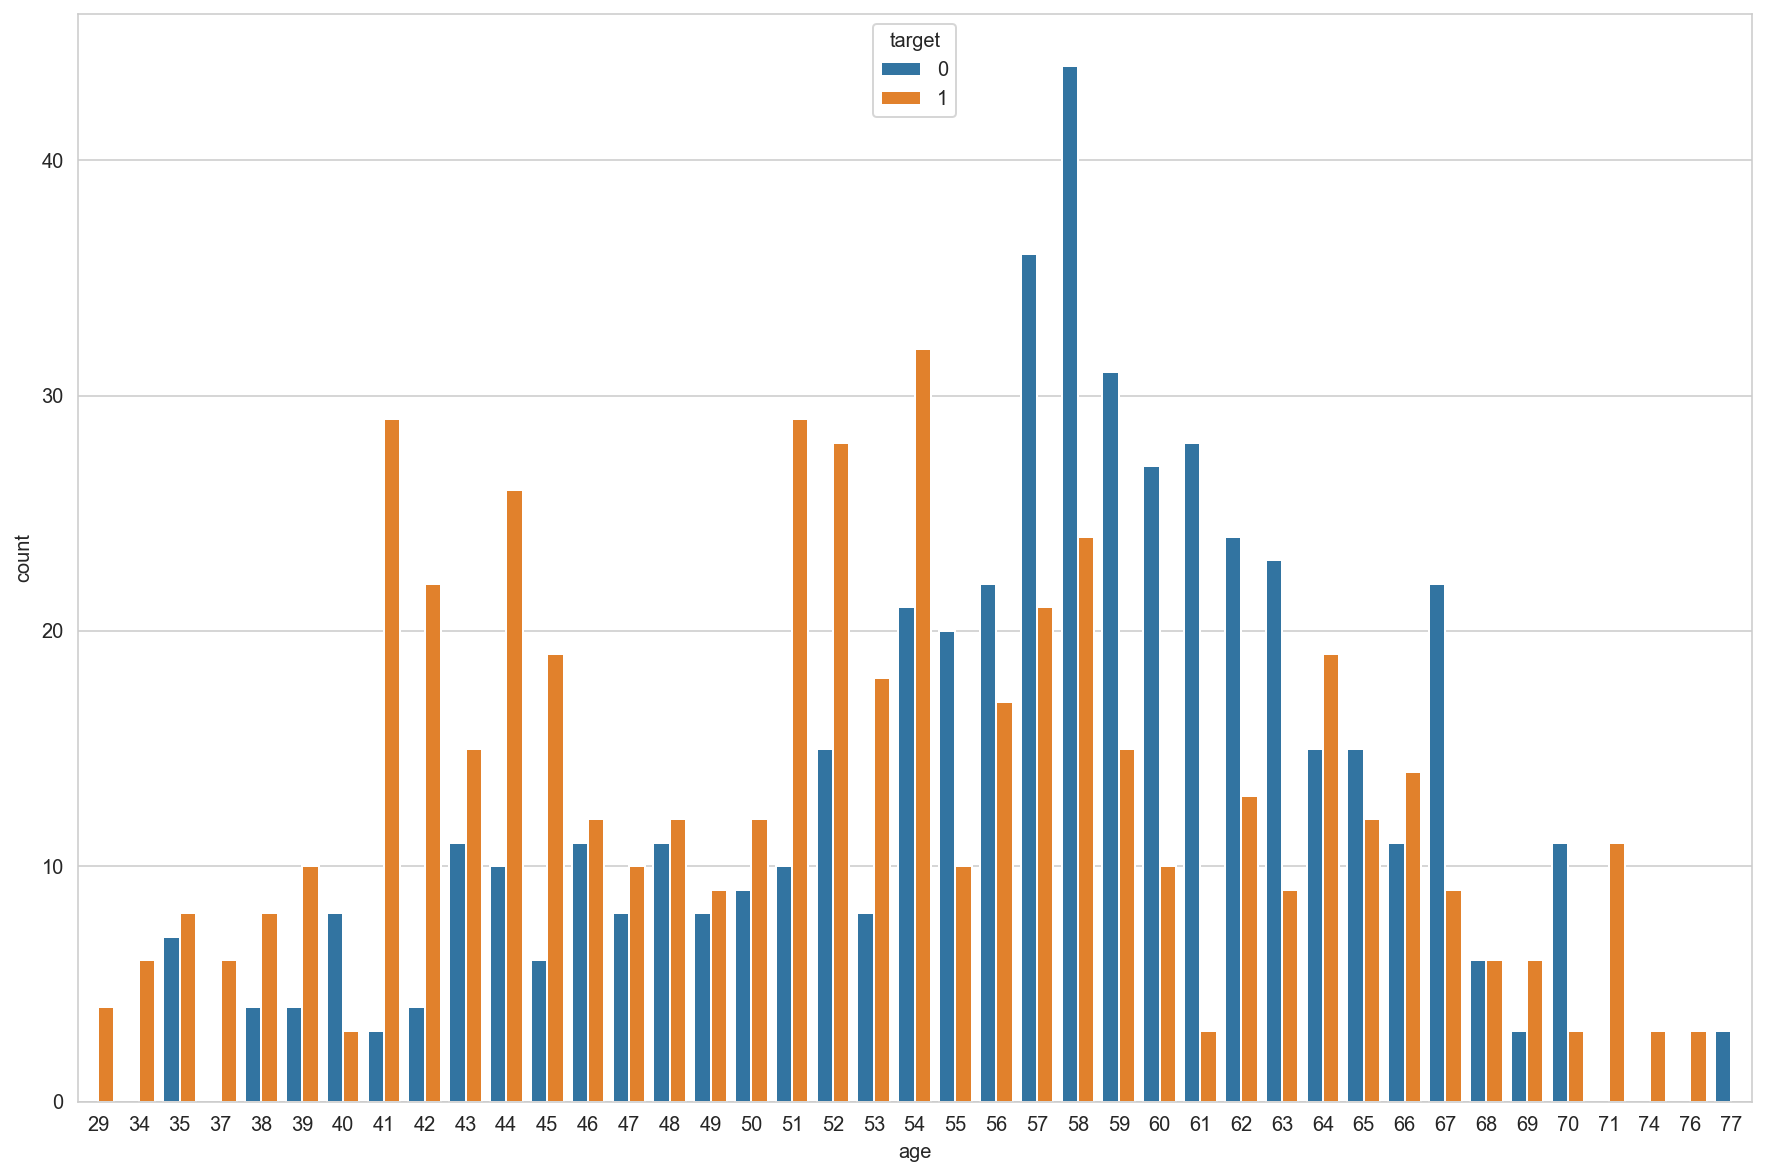

In [10]:
# Let's see what age has the highest risk for heart disease 
plt.figure(figsize = (15,10))
sns.countplot(x='age', data=df, hue='target')
plt.show()

In [11]:
# Prepare data for training. We're going to predict the target variable

X = df.drop('target', axis=1)
Y = df['target']
print(X.shape, Y.shape, df.columns)

(1025, 13) (1025,) Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [12]:
# Split the data into train and test sets
# test_size - This parameter specifies the size of the testing dataset. The default state suits the training size. It will be set to 0.25 if the training size is set to default.
#train_size - This parameter sets the size of the training dataset. There are three options: None, Int, float
#random_state - The default mode performs a random split using np.random. Alternatively, you can add an integer using an exact number.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = 0.7, test_size = 0.3, random_state = 39, shuffle = True)

In [13]:
#Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [14]:
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)
print (df.columns)

(717, 13) (717,)
(308, 13) (308,)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [15]:
# Find which features are the most important in relation to heart disease
best_score = 0
model = XGBClassifier(max_depth=7)
model.fit(X_train, Y_train, eval_set=[(X_train,Y_train), (X_test,Y_test)], eval_metric='logloss', verbose=False)
predictions = model.predict(X_test)
best_score = accuracy_score(Y_test,predictions)
print("XGBClassifier accuracy :", best_score)

XGBClassifier accuracy : 0.9967532467532467


In [16]:
print(X.columns)
print(model.feature_importances_*100)
print(model.classes_)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
[ 3.6944318   7.3656015  25.498161    3.2934084   2.9738643   0.83381337
  3.8016672   3.3076656   7.9431815   5.304537    4.27079    12.667545
 19.045336  ]
[0 1]


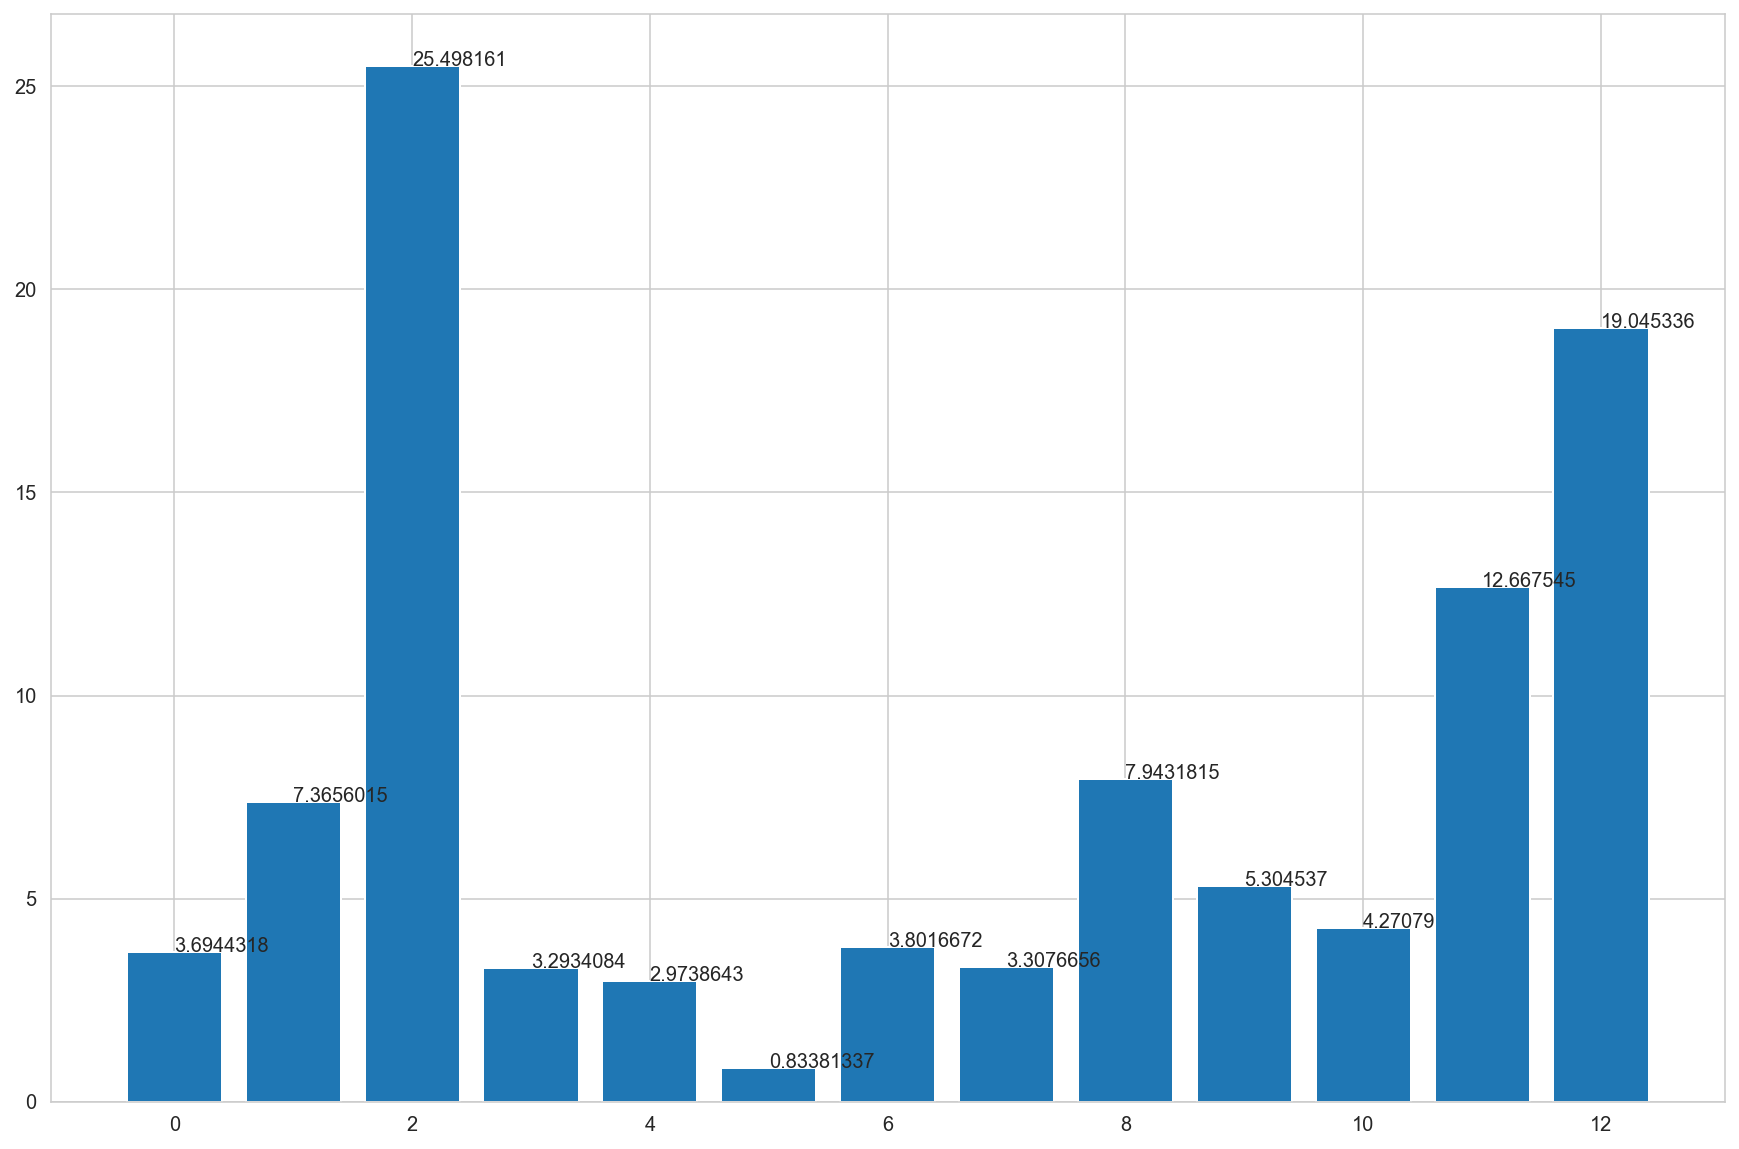

In [17]:
#Let's do a viz

plt.figure(figsize = (15,10))
rf_scores = model.feature_importances_*100
plt.bar([i for i in range(len(X.columns))], rf_scores, width=0.8) 
for i in range(len(X.columns)): 
    plt.text(i,rf_scores[i], rf_scores[i])

### Building the model

In [18]:
# First, let's create some useful callback variables

reducelrp = ReduceLROnPlateau(monitor ='val_loss', factor =0.1, patience =30, verbose =0, mode ='auto', min_delta = 0.0001, cooldown = 0, min_lr = 0)

#stop training when a monitored quantity has stopped imporving. By default, mode is set to 'auto' and knows that you want to minimize loss or maximize accuracy

early_stopping_monitor = EarlyStopping(monitor='val_loss', verbose = 1, patience=30, baseline=0.4)
#save the model after every epoch
best_trained_model_file = 'best_trained_model.h5'
checkpoint = ModelCheckpoint(best_trained_model_file, verbose=0, monitor='val_loss', save_best_only=True, mode='auto')
#place callbacks into this list
callbacks =[checkpoint,reducelrp]

In [19]:
#Setup the neural network based on the sequential API
model = Sequential()
#We will use the Keras dropout Model. This model contains the drop-out layer or layers added to it. The dropout layer
# is responsible for randomly skipping the neurons inside the neural network so that the overall odds of overfitting are 
# reduced in an optimized manner.

#Dense is an entry-level layer provided by Keras, which accepts the number of neurons or units (12 in the first added layer) as
# its required parametr. IF the layers is the first layer, then we need to provide Input_shape as well. Otherwise, the output
# of the previous layer will be used as the input of the next layer

#Keras initializers are generating tensors by using values that were constant. The argument value is nothing but a list of values
# of constant values for the dtype.

#The keras initialization will define the way for setting initial random weights onto the layers of Keras.

#Regularizers allow you to apply penalties on layer parameters or layer activity during optimization. These penalties are summed 
# into the loss function that the network optimizes.Regularization is the most used technique to penalize complex models in machine
# learning, it is deployed for reducing overfitting (or, contracting generalization errors) by putting network weights small. 
# Also, it enhances the performance of models for new inputs.
model.add(Dense(12, input_dim=13,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer="Adamax",metrics=['accuracy'])
model.summary()

#be careful of TypeError and ValueError. TypeError will happen if the present alyer is not part of an instance of the existing layer
# and ValueError will occur if a layer present is not known with the red input shape

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                168       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


Training model... Please wait.


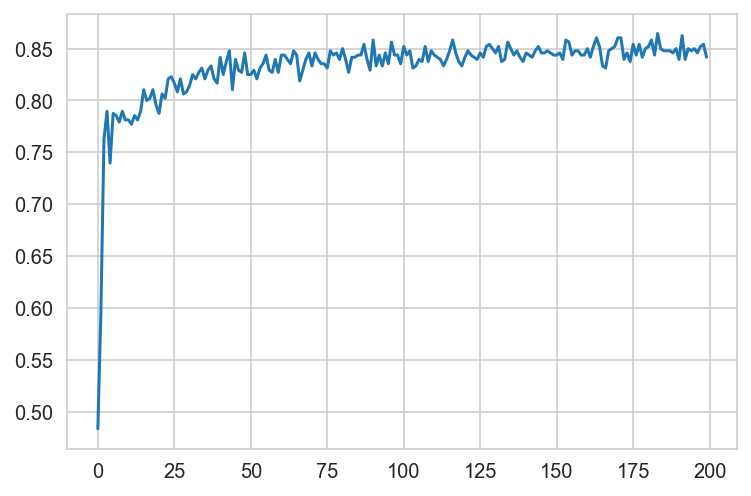

Model trainig is finished


In [20]:
# Let's now train the model. We do this by using the #.fit method

#We'd like to see a monotonically increaseing graph

print("Training model... Please wait.")
history = model.fit(X_train, Y_train, validation_split=0.33, epochs = 200, batch_size = 6, callbacks = callbacks, verbose =0)
plt.plot(history.history['accuracy'])
plt.show()
print("Model trainig is finished")

In [21]:
# Now that our model is trained, let's evaluate the model

print("Evaluate the model")

score = model.evaluate(X_train, Y_train, verbose =0)
print("score %s: %.2f%%" % (model.metrics_names[1], score[1]*100))

print("Evaluate model against new data")
score = model.evaluate(X_test, Y_test, verbose=0)
print("score %s: %.2f%%" % (model.metrics_names[1], score[1]*100))


Evaluate the model
score accuracy: 85.22%
Evaluate model against new data
score accuracy: 82.47%


In [22]:
# Run prediction
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Model prediction test")
# prediction return class type (1 or 0)
pred = model.predict(X_test)
# y_pred_class = model.predict_classes(X_test) # This function was removed in TensorFlow 2.6 and updated to the following
Y_pred_class = np.argmax(pred, axis = 1)
# prediction return proability percentage
#y_pred_prob = model.predict(X_test)# This function was removed in TensorFlow 2.6 and updated to the following
Y_pred_prob = model.predict(X_test)

print ("#  original | predicted  | probability  ")
for idx, label in enumerate(Y_test):
    print ("%s     | %s  | %s |   %.2f%%" % (str(idx), str(label), str(Y_pred_class[idx]), float(Y_pred_prob[idx])*100))

# manually calculate accuracy rate
print("")
count = len(["ok" for idx, label in enumerate(Y_test) if label == Y_pred_class[idx]])
print ("Manually calculated accuracy is: %.2f%%" % ((float(count) / len(Y_test))*100))
# using accuracy_score()
print ("Keras accuracy_score() is: %.2f%%" %  (accuracy_score(Y_test, Y_pred_class)*100))
print("")
print ("Simple confusion matrix ")
cm = confusion_matrix(Y_test,Y_pred_class)
print (cm)

Model prediction test
10/10 [==============================] - 0s 778us/step
#  original | predicted  | probability  
0     | 1  | 0 |   41.74%
1     | 1  | 0 |   50.75%
2     | 0  | 0 |   62.64%
3     | 1  | 0 |   79.15%
4     | 1  | 0 |   81.80%
5     | 0  | 0 |   51.28%
6     | 1  | 0 |   42.25%
7     | 1  | 0 |   82.51%
8     | 0  | 0 |   0.60%
9     | 1  | 0 |   84.98%
10     | 1  | 0 |   88.45%
11     | 0  | 0 |   2.24%
12     | 0  | 0 |   0.23%
13     | 1  | 0 |   43.30%
14     | 1  | 0 |   64.98%
15     | 0  | 0 |   87.07%
16     | 1  | 0 |   92.94%
17     | 1  | 0 |   81.91%
18     | 1  | 0 |   87.57%
19     | 0  | 0 |   25.54%
20     | 1  | 0 |   81.91%
21     | 0  | 0 |   22.82%
22     | 0  | 0 |   1.18%
23     | 0  | 0 |   3.34%
24     | 1  | 0 |   7.39%
25     | 0  | 0 |   2.61%
26     | 1  | 0 |   29.69%
27     | 0  | 0 |   2.18%
28     | 1  | 0 |   70.16%
29     | 0  | 0 |   3.31%
30     | 0  | 0 |   9.99%
31     | 1  | 0 |   92.66%
32     | 0  | 0 |   0.85%
33     | 1  

In [23]:
%%time
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
print ("running model performance validation... please wait!")
for train, test in kfold.split(X, Y):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=13, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer="Adamax", metrics=['accuracy'])
    # Fit the model
    history=model.fit(X_train, Y_train, epochs=100, batch_size=6, verbose=0)    
    # evaluate the model
    scores = model.evaluate(X_test, Y_test, verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

print ("done.")
print ("summary report on mean and std.")
# The average and standard deviation of the model performance 
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

running model performance validation... please wait!
accuracy: 84.09%
accuracy: 84.42%
accuracy: 83.77%
accuracy: 83.77%
accuracy: 83.44%
accuracy: 83.77%
accuracy: 83.77%
accuracy: 83.44%
accuracy: 83.77%
accuracy: 83.44%
done.
summary report on mean and std.
83.77% (+/- 0.29%)
Wall time: 1min 36s
